<a href="https://colab.research.google.com/github/tpathanjali/ML/blob/master/Sentiment_analysis_using_deep_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

below will install pydrive to connect to drive and sk learn

# sentiment analysis

In [0]:
!pip install -U -q sklearn
!pip install -U -q PyDrive

Below code will be used to authenticate the google drive to use data on drive

In [0]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
# This only needs to be done once per notebook.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

TrainFile = '1uitbEQqxS1E7B_w1JoxOBM9A-A06kMPT'
downloaded = drive.CreateFile({'id': TrainFile})
downloaded.GetContentFile('twittertrain.txt')
TestFile = '1ZI0pmAytx1JbCKKR4mfdxErQilljYnuA'
downloaded2 = drive.CreateFile({'id': TestFile})
downloaded2.GetContentFile('twitterTST.txt')

importing necessary **libraries**

In [52]:
import sklearn as sklearn
from string import punctuation
import re
from nltk.corpus import wordnet
import keras as kr
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import nltk
import gensim
from gensim.models.word2vec import Word2Vec 
from nltk.stem.porter import *
nltk.download('wordnet')


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

**loading the train and test data**

In [0]:
twitter_train=pd.read_csv('twittertrain.txt',sep=',',encoding='latin-1')
twitter_test=pd.read_csv('twitterTST.txt',sep=',',encoding='latin-1')

below code will clean the tweets for further analysis

*   **clean_tweet ** will clear all the unncessary punctuation and url/links
*   **RegexpReplacer** will replace patterns example isnt will be replaced to is not
*   **RepeatReplacer** will remove unnecessary letters in words eg ohhh myyyy godd will be replaced as oh my god
*   **Integrate** will integrate all the above functions to give the output



In [0]:
def clean_tweet(tweet): 
    X= ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|(\d)|(#(\w+))", " ", tweet).split())
    return(X.lower())
replacement_patterns = [(r'its', 'it is'),(r'im', 'i am'),(r'isnt', 'is not'),(r'thats', 'that is'),(r'won\'t', 'will not'),(r'can\'t', 'can not'),(r'i\'m', 'i am'),(r'ain\'t', 'is not'),(r'(\w+)\'ll', '\g<1> will'),(r'(\w+)n\'t', '\g<1> not'),(r'(\w+)\'ve', '\g<1> have'),(r'(\w+)\'s', '\g<1> is'),(r'(\w+)\'re', '\g<1> are'),(r'(\w+)\'d', '\g<1> would')]
class RegexpReplacer(object): 
    def __init__(self, patterns=replacement_patterns): 
        self.patterns = [(re.compile(regex), repl) for (regex, repl) in patterns] 
    def replace(self, text):
        s = text 
        for (pattern, repl) in self.patterns: 
            (s, count) = re.subn(pattern, repl, s) 
        return s
class RepeatReplacer(object): 
    def __init__(self): 
        self.repeat_regexp = re.compile(r'(\w*)(\w)\2(\w*)') 
        self.repl = r'\1\2\3' 
    def replace(self, word): 
        if wordnet.synsets(word): 
            return word 
        repl_word = self.repeat_regexp.sub(self.repl, word) 
        if repl_word != word: 
            return self.replace(repl_word) 
        else: 
            return repl_word
def integrate(word):
  x=RegexpReplacer()
  y=RepeatReplacer()
  return(" ".join([y.replace(i) for i in clean_tweet(x.replace(word)).split(' ')]))

a new column in created on existing train dataset, just to compare the original tweet and cleaned tweet. We don't require the original tweet anymore

In [0]:
twitter_train['cleaned']=twitter_train['SentimentText'].apply(integrate)

In [25]:
twitter_train[['Sentiment','SentimentText','cleaned']]

,Sentiment,SentimentText,cleaned
0,0,is so sad for my APL frie...,is so sad for my apl friend
1,0,I missed the New Moon trail...,i missed the new moon trailer
2,1,omg its already 7:30 :O,omg it is already o
3,0,.. Omgaga. Im sooo im gunna CRy. I'...,omgaga im so i am guna cry i have been at this...
4,0,i think mi bf is cheating on me!!! ...,i think mi bf is cheating on me t t
5,0,or i just worry too much?,or i just worry too much
6,1,Juuuuuuuuuuuuuuuuussssst Chillin!!,just chilin
7,0,Sunny Again Work Tomorrow :-| ...,sunny again work tomorrow tv tonight
8,1,handed in my uniform today . i miss you ...,handed in my uniform today i miss you already
9,1,hmmmm.... i wonder how she my number @-),hm i wonder how she my number


In [37]:
twitter_train['Sentiment'].value_counts()

1    56457
0    43532
Name: Sentiment, dtype: int64

seems, we have almost equal amount of sentiments for positive and negative sentiments. we can consider 30k of each for training and rest for test. Anyway we have an entirely bigger test dataset for testing

In [0]:
tokenized_tweets=twitter_train['cleaned'].apply(lambda x: x.split())

In [54]:

stemmer = PorterStemmer()

tokenized_tweets = tokenized_tweets.apply(lambda x: [stemmer.stem(i) for i in x]) # stemming
tokenized_tweets.head()

0                  [is, so, sad, for, my, apl, friend]
1                   [i, miss, the, new, moon, trailer]
2                            [omg, it, is, alreadi, o]
3    [omgaga, im, so, i, am, guna, cri, i, have, be...
4          [i, think, mi, bf, is, cheat, on, me, t, t]
Name: cleaned, dtype: object

In [0]:
for i in range(len(tokenized_tweets)):
    tokenized_tweets[i] = ' '.join(tokenized_tweets[i])

twitter_train['cleaned'] = tokenized_tweets

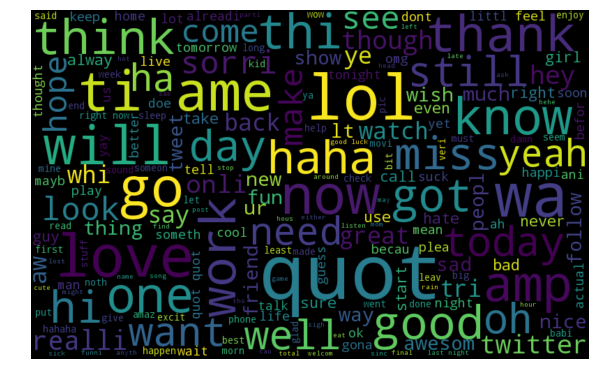

In [66]:
all_words = ' '.join([text for text in twitter_train['cleaned']])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()